## Add some feature to the data: daily high, low and avg. for weather variables and total fires per bin

In [1]:
import pandas as pd

In [2]:
# Window size in hrs for min/max/mean
window_size = 24

# Location of raw data
input_data_file = '../data/training_data/1992-2015_training_data_raw.csv'
output_data_file = '../data/training_data/1992-2015_training_data_added_features.csv'

# Data types for read csv
dtypes = {
    'weather_bin_time': object,
    'weather_bin_month': int,
    'weather_bin_year': int,
    'weather_bin_day': int,
    'air.2m': float,
    'apcp': float,
    'rhum.2m': float,
    'dpt.2m': float,
    'pres.sfc': float,
    'uwnd.10m': float,
    'vwnd.10m': float,
    'veg': float,
    'vis': float,
    'lat': float,
    'lon': float,
    'ignition': float
}

# Features to include in min/max/mean
input_features = [
    'weather_bin_time',
    'air.2m',
    'apcp',
    'rhum.2m',
    'dpt.2m',
    'pres.sfc',
    'uwnd.10m', 
    'vwnd.10m',
    'veg',
    'vis',
    'lat',
    'lon',
]

In [3]:
# Read data
data = pd.read_csv(input_data_file, dtype=dtypes)

**First add mean, min and max features for continuous weather features**

In [4]:
# Add mean features

# Names for new columns
new_features = [
    'mean.weather_bin_time',
    'mean.air.2m',
    'mean.apcp',
    'mean.rhum.2m',
    'mean.dpt.2m',
    'mean.pres.sfc',
    'mean.uwnd.10m', 
    'mean.vwnd.10m',
    'mean.veg',
    'mean.vis',
    'mean.lat',
    'mean.lon',
]

# Reverse data so that the calculated value is assigned to the leading edge of
# the window with respect to time
data_reversed = data.iloc[::-1]

# Group by location and calculate mean in rolling window over time
daily_mean = data_reversed[input_features].groupby(['lat', 'lon']).rolling(int((window_size/3)), on="weather_bin_time").mean()

# Clean up columns
daily_mean = daily_mean.droplevel(['lat', 'lon'])
daily_mean.columns = new_features
daily_mean.drop(['mean.weather_bin_time', 'mean.lat', 'mean.lon'], axis=1, inplace=True)

In [5]:
# Add max features

# Names for new columns
new_features = [
    'max.weather_bin_time',
    'max.air.2m',
    'max.apcp',
    'max.rhum.2m',
    'max.dpt.2m',
    'max.pres.sfc',
    'max.uwnd.10m', 
    'max.vwnd.10m',
    'max.veg',
    'max.vis',
    'max.lat',
    'max.lon',
]

# Reverse data so that the calculated value is assigned to the leading edge of
# the window with respect to time
data_reversed = data.iloc[::-1]

# Group by location and calculate mean in rolling window over time
daily_max = data_reversed[input_features].groupby(['lat', 'lon']).rolling(int((window_size/3)), on="weather_bin_time").max()

# Clean up columns
daily_max = daily_max.droplevel(['lat', 'lon'])
daily_max.columns = new_features
daily_max.drop(['max.weather_bin_time', 'max.lat', 'max.lon'], axis=1, inplace=True)

In [6]:
# Add min. features

# Names for new columns
new_features = [
    'min.weather_bin_time',
    'min.air.2m',
    'min.apcp',
    'min.rhum.2m',
    'min.dpt.2m',
    'min.pres.sfc',
    'min.uwnd.10m', 
    'min.vwnd.10m',
    'min.veg',
    'min.vis',
    'min.lat',
    'min.lon',
]

# Reverse data so that the calculated value is assigned to the leading edge of
# the window with respect to time
data_reversed = data.iloc[::-1]

# Group by location and calculate mean in rolling window over time
daily_min = data_reversed[input_features].groupby(['lat', 'lon']).rolling(int((window_size/3)), on="weather_bin_time").min()

# Clean up columns
daily_min = daily_min.droplevel(['lat', 'lon'])
daily_min.columns = new_features
daily_min.drop(['min.weather_bin_time', 'min.lat', 'min.lon'], axis=1, inplace=True)

In [7]:
joined = data.join([daily_mean, daily_max, daily_min])

In [8]:
# Choose one bin at random and retrive one month worth of data
one_fire = joined[
    (joined['weather_bin_year'] == 1994) & 
    (joined['weather_bin_month'] == 7) &
    (joined['lat'] == 39.30418) &
    (joined['lon'] == -123.2773)
]

# Sort data for plotting
one_fire = one_fire.sort_values(by='weather_bin_time',ascending=True)

# Add hour number
one_fire.insert(0, 'hour', range(1, (3 * len(one_fire)), 3))

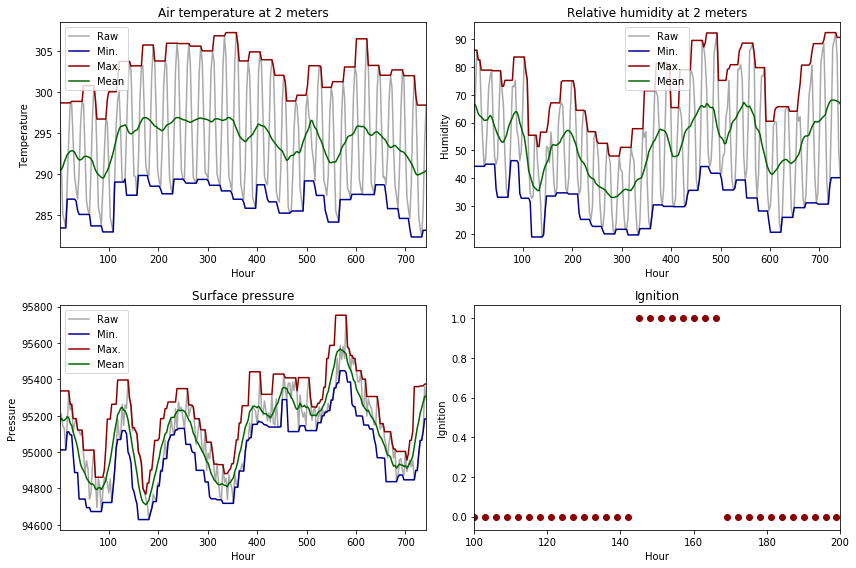

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot weather features for single fire
xmin = min(one_fire['hour'])
xmax = max(one_fire['hour'])

plt.subplots(2,2,figsize=(12,8))

plt.subplot(2, 2, 1)

plt.plot(
    one_fire['hour'], 
    one_fire['air.2m'],
    color = "darkgray",
    label ='Raw'
)
plt.plot(
    one_fire['hour'], 
    one_fire['min.air.2m'],
    color = "darkblue",
    label ='Min.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['max.air.2m'],
    color = "darkred",
    label ='Max.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['mean.air.2m'],
    color = "darkgreen",
    label ='Mean'
)
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Air temperature at 2 meters')
plt.legend()
plt.xlim(xmin,xmax)


plt.subplot(2, 2, 2)

plt.plot(
    one_fire['hour'], 
    one_fire['rhum.2m'],
    color = "darkgray",
    label ='Raw'
)
plt.plot(
    one_fire['hour'], 
    one_fire['min.rhum.2m'],
    color = "darkblue",
    label ='Min.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['max.rhum.2m'],
    color = "darkred",
    label ='Max.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['mean.rhum.2m'],
    color = "darkgreen",
    label ='Mean'
)
plt.xlabel('Hour')
plt.ylabel('Humidity')
plt.title('Relative humidity at 2 meters')
plt.legend()
plt.xlim(xmin,xmax)


plt.subplot(2, 2, 3)

plt.plot(
    one_fire['hour'], 
    one_fire['pres.sfc'],
    color = "darkgray",
    label ='Raw'
)
plt.plot(
    one_fire['hour'], 
    one_fire['min.pres.sfc'],
    color = "darkblue",
    label ='Min.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['max.pres.sfc'],
    color = "darkred",
    label ='Max.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['mean.pres.sfc'],
    color = "darkgreen",
    label ='Mean'
)
plt.xlabel('Hour')
plt.ylabel('Pressure')
plt.title('Surface pressure')
plt.legend()
plt.xlim(xmin,xmax)


plt.subplot(2, 2, 4)

plt.scatter(
    one_fire['hour'], 
    one_fire['ignition'],
    color = "darkred"
)

plt.xlabel('Hour')
plt.ylabel('Ignition')
plt.title('Ignition')
plt.xlim(100,200)


plt.tight_layout()
plt.show()

**One step further - take daily average to reduce size of dataset**

In [10]:
joined = joined.groupby([
    'lat', 
    'lon', 
    'weather_bin_year',
    'weather_bin_month',
    'weather_bin_day'
]).mean().reset_index()

joined.reset_index(drop=True, inplace=True)

ignitions = joined[joined['ignition'] > 0].copy()
no_ignitions = joined[joined['ignition'] == 0].copy()
ignitions['ignition'] = 1

joined = ignitions.append(no_ignitions)

In [11]:
# Choose one bin at random and retrive one month worth of data
one_fire = joined[
    (joined['weather_bin_year'] == 1994) & 
    (joined['weather_bin_month'] == 7) &
    (joined['lat'] == 39.30418) &
    (joined['lon'] == -123.2773)
]

# Sort data for plotting
one_fire = one_fire.sort_values(by='weather_bin_day',ascending=True)

# Add hour number
one_fire.insert(0, 'hour', range(12, (24 * len(one_fire)), 24))

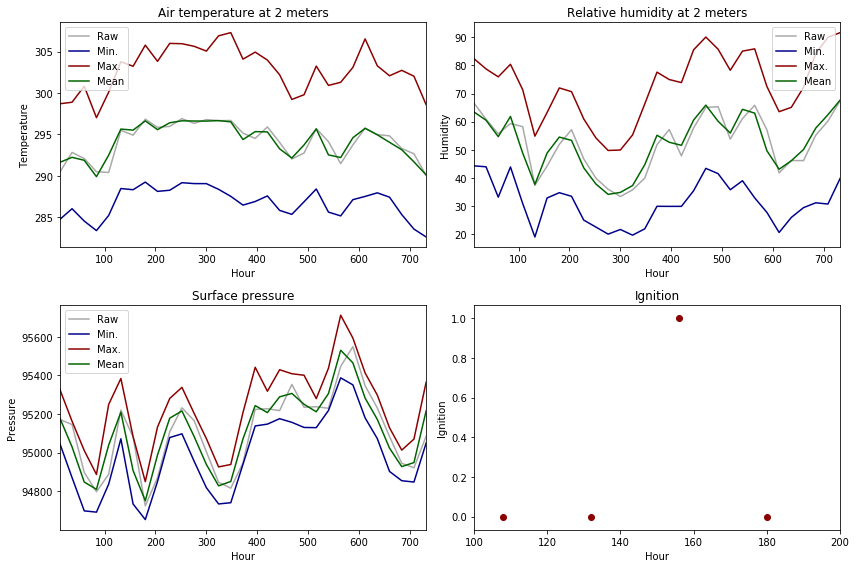

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot weather features for single fire
xmin = min(one_fire['hour'])
xmax = max(one_fire['hour'])

plt.subplots(2,2,figsize=(12,8))

plt.subplot(2, 2, 1)

plt.plot(
    one_fire['hour'], 
    one_fire['air.2m'],
    color = "darkgray",
    label ='Raw'
)
plt.plot(
    one_fire['hour'], 
    one_fire['min.air.2m'],
    color = "darkblue",
    label ='Min.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['max.air.2m'],
    color = "darkred",
    label ='Max.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['mean.air.2m'],
    color = "darkgreen",
    label ='Mean'
)
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Air temperature at 2 meters')
plt.legend()
plt.xlim(xmin,xmax)


plt.subplot(2, 2, 2)

plt.plot(
    one_fire['hour'], 
    one_fire['rhum.2m'],
    color = "darkgray",
    label ='Raw'
)
plt.plot(
    one_fire['hour'], 
    one_fire['min.rhum.2m'],
    color = "darkblue",
    label ='Min.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['max.rhum.2m'],
    color = "darkred",
    label ='Max.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['mean.rhum.2m'],
    color = "darkgreen",
    label ='Mean'
)
plt.xlabel('Hour')
plt.ylabel('Humidity')
plt.title('Relative humidity at 2 meters')
plt.legend()
plt.xlim(xmin,xmax)


plt.subplot(2, 2, 3)

plt.plot(
    one_fire['hour'], 
    one_fire['pres.sfc'],
    color = "darkgray",
    label ='Raw'
)
plt.plot(
    one_fire['hour'], 
    one_fire['min.pres.sfc'],
    color = "darkblue",
    label ='Min.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['max.pres.sfc'],
    color = "darkred",
    label ='Max.'
)
plt.plot(
    one_fire['hour'], 
    one_fire['mean.pres.sfc'],
    color = "darkgreen",
    label ='Mean'
)
plt.xlabel('Hour')
plt.ylabel('Pressure')
plt.title('Surface pressure')
plt.legend()
plt.xlim(xmin,xmax)


plt.subplot(2, 2, 4)

plt.scatter(
    one_fire['hour'], 
    one_fire['ignition'],
    color = "darkred"
)

plt.xlabel('Hour')
plt.ylabel('Ignition')
plt.title('Ignition')
plt.xlim(100,200)


plt.tight_layout()
plt.show()

In [13]:
import numpy as np
raw_percent_ignition = np.round(((len(data[data['ignition'] == 1])/len(data))*100),2)
joined_percent_ignition = np.round(((len(joined[joined['ignition'] == 1])/len(joined))*100),2)
print("Raw data is {}% ignition".format(raw_percent_ignition))
print("Processed data is {}% ignition".format(joined_percent_ignition))

Raw data is 4.59% ignition
Processed data is 3.64% ignition


**Add total fires per lat/lon bin**

In [14]:
total_fires = data[['lat', 'lon', 'ignition']].groupby(['lat', 'lon']).sum()
joined['total_fires'] = joined.apply(lambda x: total_fires.loc[(x['lat'], x['lon'])], axis=1)

In [15]:
joined.to_csv(output_data_file, index=False)